In [21]:
# import basic utility packages
import pandas as pd
import numpy as np
import pickle
from datetime import datetime

# import model training packages
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

# import metrics packages
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# importing the visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# reading the sample dataset
data = pd.read_excel('/Users/hargun/Desktop/Data/CM_ML_training_colinear_removed.xlsx')
data.head()

,z,PL_L_x,PL_L_y,PL_R_x,PL_R_y,PM_x,PM_y,PP_x,CM_x,CM_y,CM_z,CM_x_pred_n,CM_y_pred_n,CM_z_pred_n
0,-5.297,-2.448,-22.021,0.310,-22.155,-12.926,5.728,-31.907,-9.78206,-19.0619,-1.66384,NaN,NaN,NaN
1,-2.037,-0.456,-26.823,3.522,-26.804,-11.442,5.782,-30.579,-7.32496,-24.0915,2.92988,NaN,NaN,NaN
2,-5.617,-1.504,-25.327,2.342,-25.391,-14.133,5.914,-28.278,-7.63225,-22.1851,-2.02365,NaN,NaN,NaN
3,-1.416,-1.647,-26.022,0.466,-26.029,-12.983,5.493,-30.592,-7.98994,-22.4696,2.70457,NaN,NaN,NaN
4,-7.443,-0.447,-21.629,1.748,-21.660,-11.126,8.203,-27.702,-6.63725,-18.8869,-3.30866,NaN,NaN,NaN


In [24]:
# separating the independent and dependent variables
xData = data[['z', 'PL_L_x', 'PL_L_y', 'PL_R_x', 'PL_R_y', 'PM_x', 'PM_y','PP_x']]
yData = data[['CM_x', 'CM_y', 'CM_z']]

In [25]:
# feature engineering on xData
# NOT REQUIRED AS OF NOW (MAYBE IN FUTURE)

In [26]:
# train-test split
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, random_state = 0, test_size = 0.25, shuffle = True)

# resetting the indices
xTrain.reset_index(inplace = True, drop = True)
xTest.reset_index(inplace = True, drop = True)
yTrain.reset_index(inplace = True, drop = True)
yTest.reset_index(inplace = True, drop = True)

xTrain.shape, xTest.shape, yTrain.shape, yTest.shape

((148, 8), (50, 8), (148, 3), (50, 3))

In [29]:
# fitting the model to the dataset (This is done independently for CM_x, CM_y, CM_z unline Linear Regression)
# CM_x
modelX = SVR(kernel = 'linear')
modelX.fit(xTrain, yTrain['CM_x'])

# CM_y
modelY = SVR(kernel = 'linear')
modelY.fit(xTrain, yTrain['CM_y'])

# CM_z
modelZ = SVR(kernel = 'linear')
modelZ.fit(xTrain, yTrain['CM_z'])

# printing all the coefficients
coefficients = pd.DataFrame(np.array([modelX.coef_, modelY.coef_, modelY.coef_]).reshape(3, 8), columns = ['z', 'PL_L_x', 'PL_L_y', 'PL_R_x', 'PL_R_y', 'PM_x', 'PM_y','PP_x'], index = ['x', 'y', 'z'])
coefficients['Intercept'] = np.array([modelX.intercept_, modelY.intercept_, modelY.intercept_])
coefficients

,z,PL_L_x,PL_L_y,PL_R_x,PL_R_y,PM_x,PM_y,PP_x,Intercept
x,-0.002477,0.357507,-0.211452,0.235935,0.159688,0.195579,0.039641,0.196129,-1.163408
y,-0.009277,-0.111005,0.170242,-0.018685,0.546933,0.067577,0.122522,-0.034126,-5.027238
z,-0.009277,-0.111005,0.170242,-0.018685,0.546933,0.067577,0.122522,-0.034126,-5.027238


In [30]:
# predicting the train data 
yPredTrainX = pd.DataFrame(modelX.predict(xTrain), columns = ['CM_x_pred'])
yPredTrainY = pd.DataFrame(modelY.predict(xTrain), columns = ['CM_y_pred'])
yPredTrainZ = pd.DataFrame(modelZ.predict(xTrain), columns = ['CM_z_pred'])

# consolidated train data
dataTrain = pd.concat([xTrain, yTrain, yPredTrainX, yPredTrainY, yPredTrainZ], axis = 1)
dataTrain.head()

,z,PL_L_x,PL_L_y,PL_R_x,PL_R_y,PM_x,PM_y,PP_x,CM_x,CM_y,CM_z,CM_x_pred,CM_y_pred,CM_z_pred
0,-8.372,-0.549,-19.366,2.337,-19.201,-11.366,14.044,-23.576,-5.94848,-16.6619,-6.38699,-6.048929,-16.973676,-5.683913
1,4.229,-1.530,-23.416,1.933,-23.416,-13.870,10.055,-32.959,-8.53844,-20.8687,8.86912,-8.831018,-20.306680,8.298412
2,-5.468,-0.606,-22.598,2.550,-22.722,11.847,5.935,30.353,8.55915,-21.2955,-2.08575,8.890484,-20.739475,-2.011594
3,-5.415,-1.096,-22.884,3.133,-22.798,13.304,8.492,28.917,9.25086,-20.5207,-2.51859,9.005742,-20.325971,-2.193825
4,-5.123,-1.504,-23.514,0.416,-23.671,-11.385,7.718,-26.638,-7.58767,-20.3798,-1.39448,-7.543360,-20.684730,-1.050883


In [31]:
# metrics calculations for train data
mseXTrain, mseYTrain, mseZTrain = mean_squared_error(dataTrain['CM_x'], dataTrain['CM_x_pred']), mean_squared_error(dataTrain['CM_y'], dataTrain['CM_y_pred']), mean_squared_error(dataTrain['CM_z'], dataTrain['CM_z_pred'])
print("Train Metrics:")
print("MSE X: " + str(mseXTrain))
print("MSE Y: " + str(mseYTrain))
print("MSE Z: " + str(mseZTrain))

Train Metrics:
MSE X: 0.5574018242682826
MSE Y: 0.3498541108976794
MSE Z: 0.47022954115087845


In [32]:
# predicting the test data 
yPredTestX = pd.DataFrame(modelX.predict(xTest), columns = ['CM_x_pred'])
yPredTestY = pd.DataFrame(modelY.predict(xTest), columns = ['CM_y_pred'])
yPredTestZ = pd.DataFrame(modelZ.predict(xTest), columns = ['CM_z_pred'])

# consolidated test data
dataTest = pd.concat([xTest, yTest, yPredTestX, yPredTestY, yPredTestZ], axis = 1)
dataTest.head()

,z,PL_L_x,PL_L_y,PL_R_x,PL_R_y,PM_x,PM_y,PP_x,CM_x,CM_y,CM_z,CM_x_pred,CM_y_pred,CM_z_pred
0,2.683,-1.218,-21.628,1.753,-21.177,-13.120,6.948,-27.891,-6.60714,-19.9454,6.511340,-7.761146,-19.297577,6.399670
1,-5.321,-0.234,-23.159,3.106,-23.326,12.374,7.794,32.449,8.98544,-20.8269,-2.157700,9.764314,-21.026520,-1.918687
2,-5.415,-1.096,-22.884,3.133,-22.798,-11.879,8.623,-29.372,-6.95743,-19.8588,-2.132760,-7.346504,-20.022555,-2.154965
3,-4.225,-0.474,-25.774,2.149,-26.194,10.553,8.763,28.995,8.33527,-22.9517,-0.538357,8.549802,-22.892411,-0.168515
4,-3.896,-0.787,-21.461,2.853,-21.582,-10.073,6.726,-27.140,-6.91366,-19.0378,-1.310950,-6.696797,-19.344941,-0.456731


In [33]:
# metrics calculations for test data
mseXTest, mseYTest, mseZTest = mean_squared_error(dataTest['CM_x'], dataTest['CM_x_pred']), mean_squared_error(dataTest['CM_y'], dataTest['CM_y_pred']), mean_squared_error(dataTest['CM_z'], dataTest['CM_z_pred'])
print("Test Metrics:")
print("MSE X: " + str(mseXTest))
print("MSE Y: " + str(mseYTest))
print("MSE Z: " + str(mseZTest))

Test Metrics:
MSE X: 0.5141259540453523
MSE Y: 0.3304071820876199
MSE Z: 0.37031623205545755


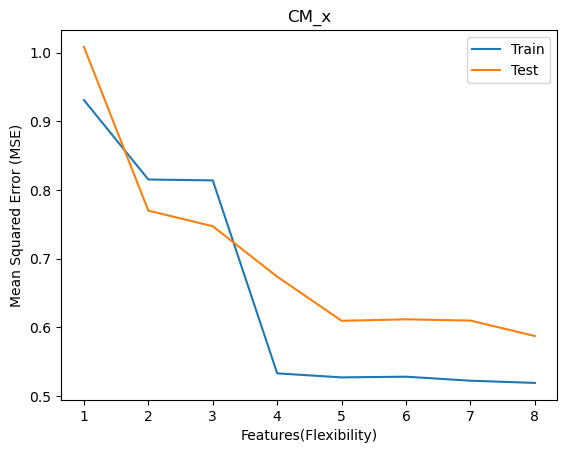

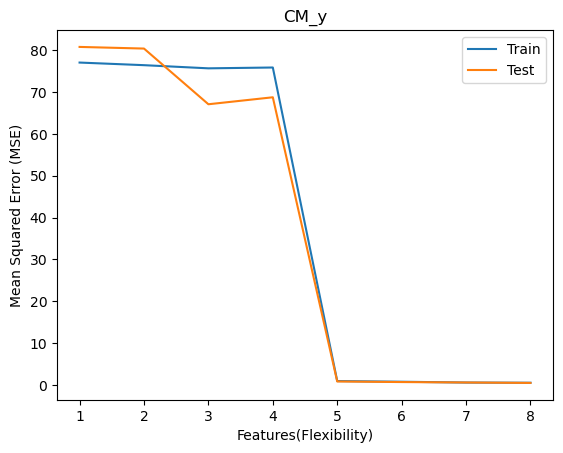

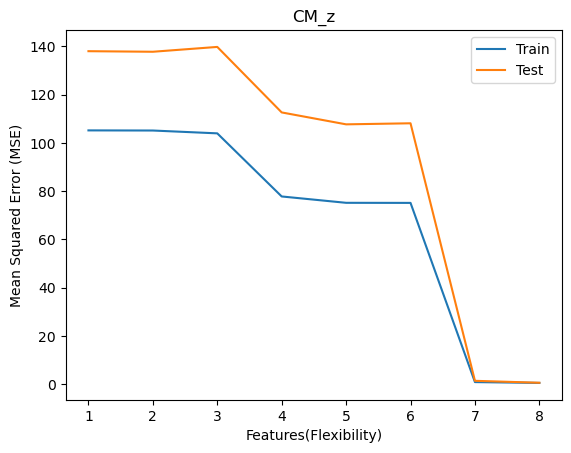

In [40]:
# analysis by removing irrelevant features one by one
xCoefficients = ['PL_R_y', 'PL_L_y', 'z', 'PL_L_x', 'PL_R_x', 'PM_y', 'PM_x', 'PP_x']
coefficientsMSETrainX = []
coefficientsMSETestX = []

yCoefficients = ['PL_R_x', 'PL_L_x', 'PM_x', 'PP_x', 'z', 'PM_y','PL_L_y', 'PL_R_y']
coefficientsMSETrainY = []
coefficientsMSETestY = []

zCoefficients = ['PP_x', 'PM_x', 'PL_R_x', 'PL_L_x', 'PM_y', 'PL_R_y', 'PL_L_y', 'z']
coefficientsMSETrainZ = []
coefficientsMSETestZ = []

while(len(xCoefficients) > 0):
    
    # Running the pipeline for CM_x    
    # separating the independent and dependent variables
    xData = data[xCoefficients]
    yData = data['CM_x']
    
    # train-test split
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, random_state = 70, test_size = 0.25, shuffle = True)

    # resetting the indices
    xTrain.reset_index(inplace = True, drop = True)
    xTest.reset_index(inplace = True, drop = True)
    yTrain.reset_index(inplace = True, drop = True)
    yTest.reset_index(inplace = True, drop = True)
    
    # fitting the model to the dataset
    model = SVR(kernel = 'linear')
    model.fit(xTrain, yTrain)
    
    # predicting the train data 
    yPredTrain = pd.DataFrame(model.predict(xTrain), columns = ['CM_x_pred'])
    yPredTest = pd.DataFrame(model.predict(xTest), columns = ['CM_x_pred'])
    
    # calculating and appending MSE on x
    mseTrain = mean_squared_error(yTrain, yPredTrain)
    coefficientsMSETrainX.append(mseTrain)
    mseTest = mean_squared_error(yTest, yPredTest)
    coefficientsMSETestX.append(mseTest)
    
    # removing the coefficient and running the pipeline again
    xCoefficients.pop(0)
    
    # Running the pipeline for CM_y    
    # separating the independent and dependent variables
    xData = data[yCoefficients]
    yData = data['CM_x']
    
    # train-test split
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, random_state = 0, test_size = 0.25, shuffle = True)

    # resetting the indices
    xTrain.reset_index(inplace = True, drop = True)
    xTest.reset_index(inplace = True, drop = True)
    yTrain.reset_index(inplace = True, drop = True)
    yTest.reset_index(inplace = True, drop = True)
    
    # fitting the model to the dataset
    model = SVR(kernel = 'linear')
    model.fit(xTrain, yTrain)
    
    # predicting the train data 
    yPredTrain = pd.DataFrame(model.predict(xTrain), columns = ['CM_x_pred'])
    yPredTest = pd.DataFrame(model.predict(xTest), columns = ['CM_x_pred'])
    
    # calculating and appending MSE on x
    mseTrain = mean_squared_error(yTrain, yPredTrain)
    coefficientsMSETrainY.append(mseTrain)
    mseTest = mean_squared_error(yTest, yPredTest)
    coefficientsMSETestY.append(mseTest)
    
    # removing the coefficient and running the pipeline again
    yCoefficients.pop(0)
    
    # Running the pipeline for CM_z    
    # separating the independent and dependent variables
    xData = data[zCoefficients]
    yData = data['CM_x']
    
    # train-test split
    xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, random_state = 70, test_size = 0.25, shuffle = True)

    # resetting the indices
    xTrain.reset_index(inplace = True, drop = True)
    xTest.reset_index(inplace = True, drop = True)
    yTrain.reset_index(inplace = True, drop = True)
    yTest.reset_index(inplace = True, drop = True)
    
    # fitting the model to the dataset
    model = SVR(kernel = 'linear')
    model.fit(xTrain, yTrain)
    
    # predicting the train data 
    yPredTrain = pd.DataFrame(model.predict(xTrain), columns = ['CM_x_pred'])
    yPredTest = pd.DataFrame(model.predict(xTest), columns = ['CM_x_pred'])
    
    # calculating and appending MSE on x
    mseTrain = mean_squared_error(yTrain, yPredTrain)
    coefficientsMSETrainZ.append(mseTrain)
    mseTest = mean_squared_error(yTest, yPredTest)
    coefficientsMSETestZ.append(mseTest)
    
    # removing the coefficient and running the pipeline again
    zCoefficients.pop(0)

f, axs = plt.subplots()
axs.plot(np.arange(8, 0, -1), coefficientsMSETrainX, linestyle = '-', color = 'tab:blue')
axs.plot(np.arange(8, 0, -1), coefficientsMSETestX, linestyle = '-', color = 'tab:orange')
axs.legend(['Train', 'Test'])
axs.set_title("CM_x")
axs.set_xlabel("Features(Flexibility)")
axs.set_ylabel("Mean Squared Error (MSE)")

f, axs = plt.subplots()
axs.plot(np.arange(8, 0, -1), coefficientsMSETrainY, linestyle = '-', color = 'tab:blue')
axs.plot(np.arange(8, 0, -1), coefficientsMSETestY, linestyle = '-', color = 'tab:orange')
axs.legend(['Train', 'Test'])
axs.set_title("CM_y")
axs.set_xlabel("Features(Flexibility)")
axs.set_ylabel("Mean Squared Error (MSE)")

f, axs = plt.subplots()
axs.plot(np.arange(8, 0, -1), coefficientsMSETrainZ, linestyle = '-', color = 'tab:blue')
axs.plot(np.arange(8, 0, -1), coefficientsMSETestZ, linestyle = '-', color = 'tab:orange')
axs.legend(['Train', 'Test'])
axs.set_title("CM_z")
axs.set_xlabel("Features(Flexibility)")
axs.set_ylabel("Mean Squared Error (MSE)")

plt.show()

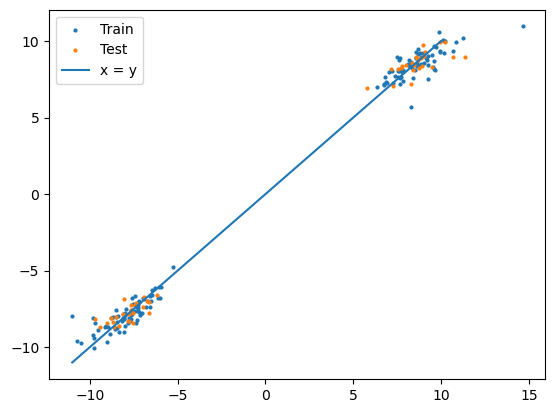

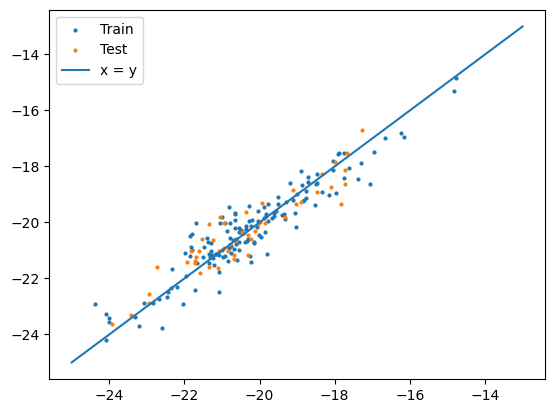

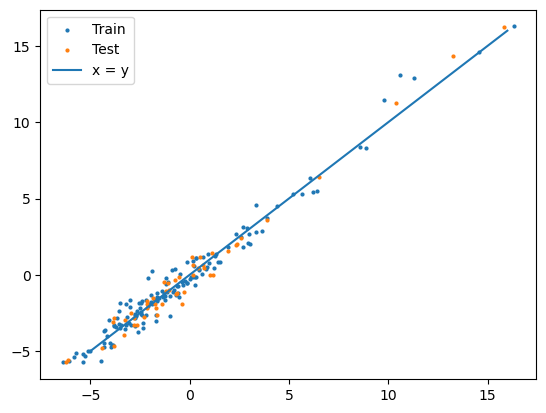

In [42]:
# CM_x scatter
plt.scatter(dataTrain['CM_x'], dataTrain['CM_x_pred'], s = 4)
plt.scatter(dataTest['CM_x'], dataTest['CM_x_pred'], s = 4)
plt.plot(np.arange(-11,11), np.arange(-11,11))
plt.legend(['Train', 'Test', 'x = y'])
plt.show()
# CM_y scatter
plt.scatter(dataTrain['CM_y'], dataTrain['CM_y_pred'], s = 4)
plt.scatter(dataTest['CM_y'], dataTest['CM_y_pred'], s = 4)
plt.plot(np.arange(-25,-12), np.arange(-25,-12))
plt.legend(['Train', 'Test', 'x = y'])
plt.show()
# CM_y scatter
plt.scatter(dataTrain['CM_z'], dataTrain['CM_z_pred'], s = 4)
plt.scatter(dataTest['CM_z'], dataTest['CM_z_pred'], s = 4)
plt.plot(np.arange(-5,17), np.arange(-5,17))
plt.legend(['Train', 'Test', 'x = y'])
plt.show()

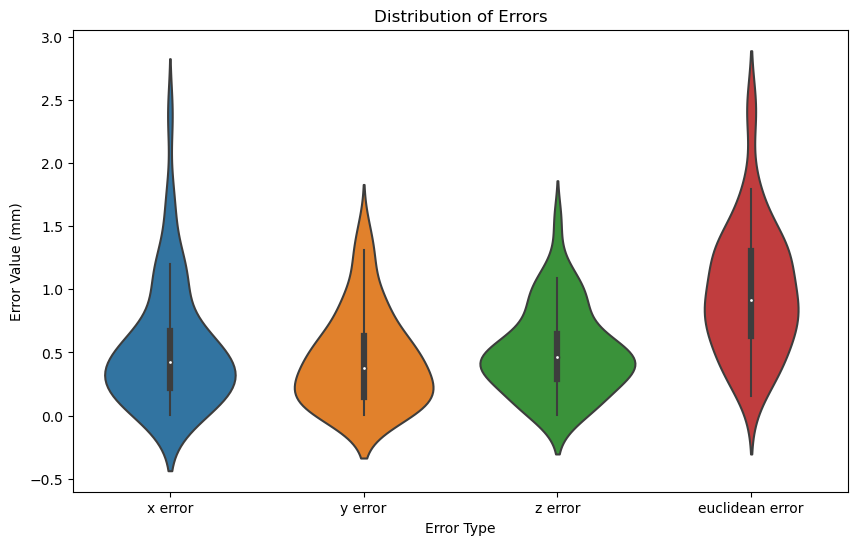

Mean Absolute Error x: 0.535 mm
Mean Absolute Error y: 0.442 mm
Mean Absolute Error z: 0.507 mm
Mean Euclidean Error: 0.983 mm


In [43]:
data['x error'] = np.abs(dataTest['CM_x'] - dataTest['CM_x_pred'])
data['y error'] = np.abs(dataTest['CM_y'] - dataTest['CM_y_pred'])
data['z error'] = np.abs(dataTest['CM_z'] - dataTest['CM_z_pred'])

# Calculate Euclidean error
data['euclidean error'] = np.sqrt((dataTest['CM_x'] - dataTest['CM_x_pred'])**2 + 
                                  (dataTest['CM_y'] - dataTest['CM_y_pred'])**2 + 
                                  (dataTest['CM_z'] - dataTest['CM_z_pred'])**2)

# Preparing data for violin plot
error_data = pd.melt(data, value_vars=['x error', 'y error', 'z error', 'euclidean error'],
                     var_name='Error Type', value_name='Error Value')

# Plotting
plt.figure(figsize=(10, 6))
sns.violinplot(x='Error Type', y='Error Value', data=error_data)
plt.title('Distribution of Errors')
plt.ylabel('Error Value (mm)')
plt.xlabel('Error Type')
plt.show()

#Mean errors value
from sklearn.metrics import mean_absolute_error
maex = mean_absolute_error(dataTest['CM_x'], dataTest['CM_x_pred'])
maey = mean_absolute_error(dataTest['CM_y'], dataTest['CM_y_pred'])
maez = mean_absolute_error(dataTest['CM_z'], dataTest['CM_z_pred'])
print(f"Mean Absolute Error x: {maex:.3f} mm")
print(f"Mean Absolute Error y: {maey:.3f} mm")
print(f"Mean Absolute Error z: {maez:.3f} mm")
distances = np.sqrt((dataTest['CM_x'] - dataTest['CM_x_pred'])**2 +
                    (dataTest['CM_y'] - dataTest['CM_y_pred'])**2 +
                    (dataTest['CM_z'] - dataTest['CM_z_pred'])**2)

# Calculate mean of these distances
mean_euclidean_error = np.mean(distances)

print(f"Mean Euclidean Error: {mean_euclidean_error:.3f} mm")